In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cell_cycle_annotation = pd.read_csv('data/cell_cycle_annotation.csv', index_col=0)

In [3]:
UMIs_c57 = pd.read_csv('data/SS3_c57_UMIs_concat.csv', index_col=0)

In [4]:
for stage in cell_cycle_annotation['x'].unique():
    df = UMIs_c57.reindex(cell_cycle_annotation[cell_cycle_annotation['x'] == stage].index, axis=1)
    print('Saving cells in {} to SS3_c57_UMIs_concat_{}.csv'.format(stage,stage))
    print(df.shape)
    df.to_csv('data/SS3_c57_UMIs_concat_{}.csv'.format(stage))

Saving cells in G1 to SS3_c57_UMIs_concat_G1.csv
(10727, 165)
Saving cells in S to SS3_c57_UMIs_concat_S.csv
(10727, 28)
Saving cells in G2M to SS3_c57_UMIs_concat_G2M.csv
(10727, 31)


In [7]:
def plot_scatters(df1,df2, name1, name2):
    df1 = df1[df1[1]][0]
    df2 = df2[df2[1]][0]
    df1_bf = pd.Series([gene[0] for gene in df1], index=df1.index)
    df2_bf = pd.Series([gene[0] for gene in df2], index=df2.index)
    df1_bs = pd.Series([gene[2]/gene[1] for gene in df1], index=df1.index)
    df2_bs = pd.Series([gene[2]/gene[1] for gene in df2], index=df2.index)
    bf_df = pd.DataFrame([df1_bf, df2_bf], index=['df1', 'df2']).T.dropna()
    bs_df = pd.DataFrame([df1_bs, df2_bs], index=['df1', 'df2']).T.dropna()
    fig, (ax1,ax2) = plt.subplots(2,1, figsize=(8,8))
    ax1.scatter(np.log10(bf_df['df1']), np.log10(bf_df['df2']), s=1)
    ax1.set_xlabel('Burst Freq. {}'.format(name1))
    ax1.set_ylabel('Burst Freq. {}'.format(name2))
    ax2.scatter(np.log10(bs_df['df1']), np.log10(bs_df['df2']), s=1)
    ax2.set_xlabel('Burst Size {}'.format(name1))
    ax2.set_ylabel('Burst Size {}'.format(name2))
    plt.tight_layout()
    plt.savefig('figures/ExtDataFig10_{}_{}_scatter_UMI.pdf'.format(name1,name2))
    plt.show()
    return 1

In [5]:
G1 = pd.read_pickle('data/SS3_c57_UMIs_concat_G1_ML.pkl')
G2M = pd.read_pickle('data/SS3_c57_UMIs_concat_G2M_ML.pkl')
S = pd.read_pickle('data/SS3_c57_UMIs_concat_S_ML.pkl')

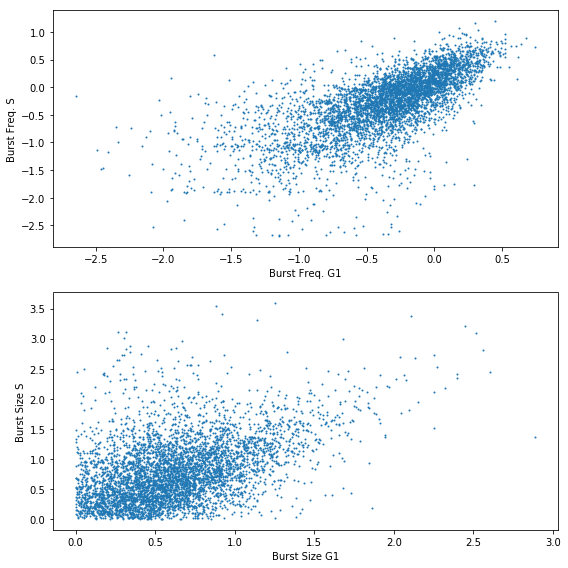

1

In [8]:
plot_scatters(G1, S, 'G1', 'S')

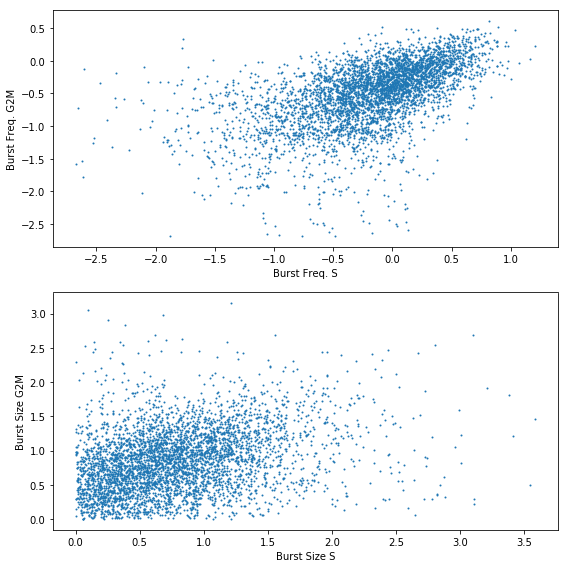

1

In [9]:
plot_scatters(S, G2M, 'S', 'G2M')

In [10]:
from statsmodels.sandbox.stats.multicomp import multipletests
def multTest(values):
    return multipletests(values, method='fdr_bh')

In [11]:
S_G2M = pd.read_pickle('data/SS3_c57_UMIs_concat_S_vs_SS3_c57_UMIs_concat_G2M_TEST.pkl')

In [12]:
S_G2M = S_G2M.dropna(how='any')

In [13]:
with open('data/S_G2M.txt','w') as compartext:
    print(*S_G2M.index.values[multTest(S_G2M[2])[0]], sep='\n', file=compartext)

In [14]:
G1_S = pd.read_pickle('data/SS3_c57_UMIs_concat_G1_vs_SS3_c57_UMIs_concat_S_TEST.pkl')

In [15]:
G1_S = G1_S.dropna(how='any')

In [16]:
with open('data/G1_S.txt','w') as compartext:
    print(*G1_S.index.values[multTest(G1_S[2])[0]], sep='\n', file=compartext)

In [18]:
GO_G1_S = pd.read_csv('data/G1_S_analysis.txt', skiprows=10, sep='\t')
GO_S_G2M = pd.read_csv('data/S_G2M_analysis.txt', skiprows=10, sep='\t')

In [19]:
GO_S_G2M_pos = GO_S_G2M[GO_S_G2M['Client Text Box Input (over/under)'] == '+']

In [21]:
def plot_GO_terms(df, title):
    plt.rcdefaults()
    plt.figure(figsize=(20,14))
    GO_terms = df['PANTHER GO-Slim Biological Process']
    y_pos = np.arange(len(GO_terms))
    fold_enrichment = np.float_(df['Client Text Box Input (fold Enrichment)'])

    plt.barh(y_pos, fold_enrichment, align='center',
            color='red')
    plt.yticks(y_pos, GO_terms, fontsize=20)
    plt.gca().invert_yaxis()
    plt.xlabel('Fold Enrichment')
    plt.title(title, fontsize=20)
    plt.tight_layout()
    plt.savefig('figures/ExtDataFig10_{}_goterms_UMI.pdf'.format(title))
    plt.show()

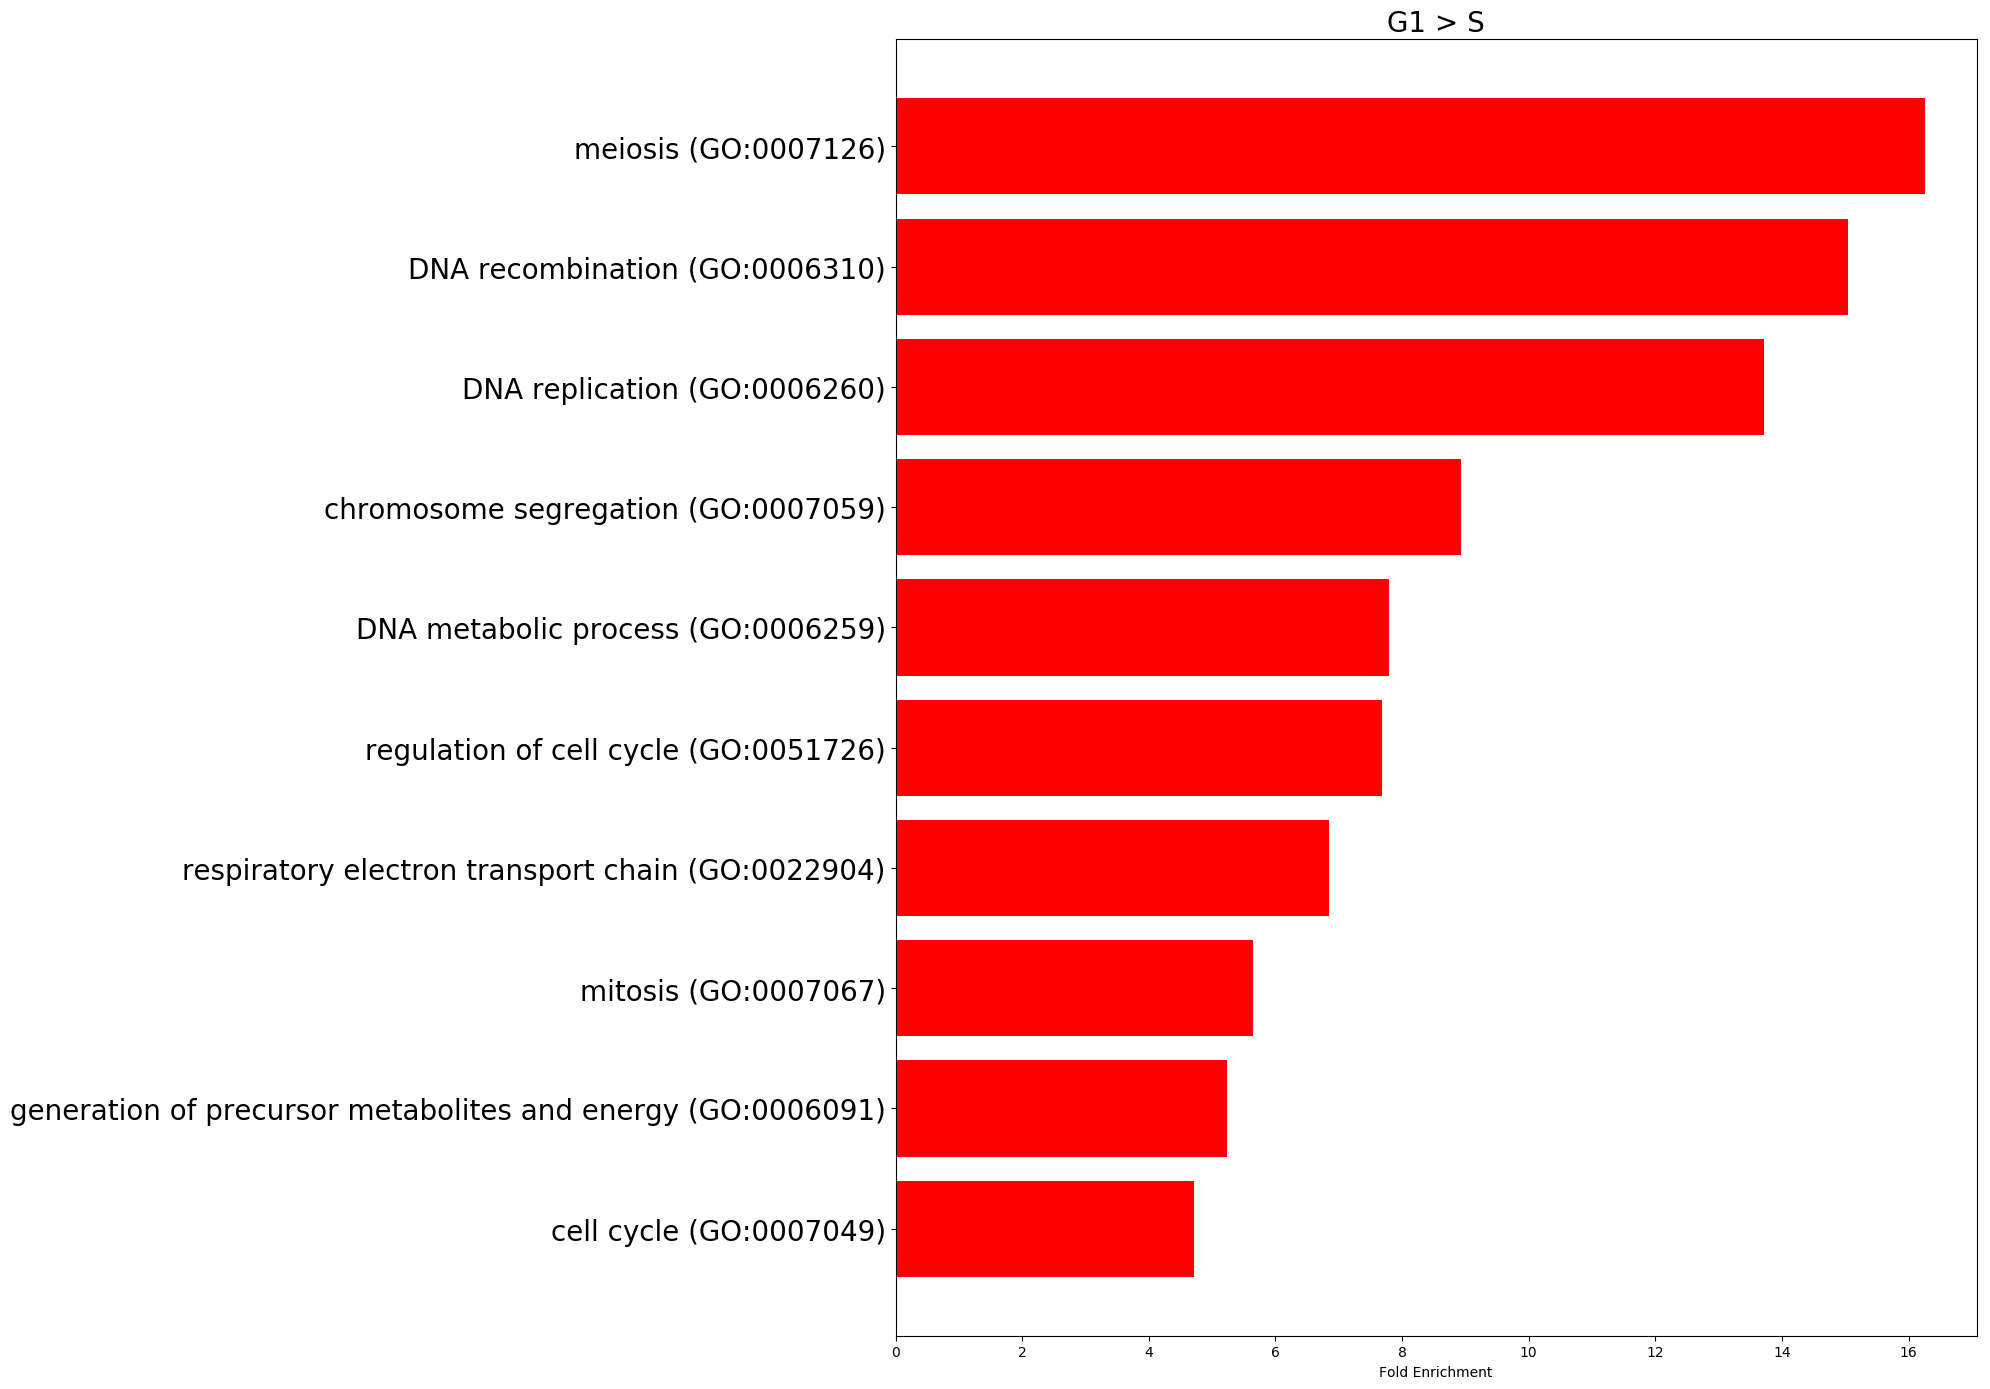

In [22]:
plot_GO_terms(GO_G1_S.head(n=10), 'G1 > S')

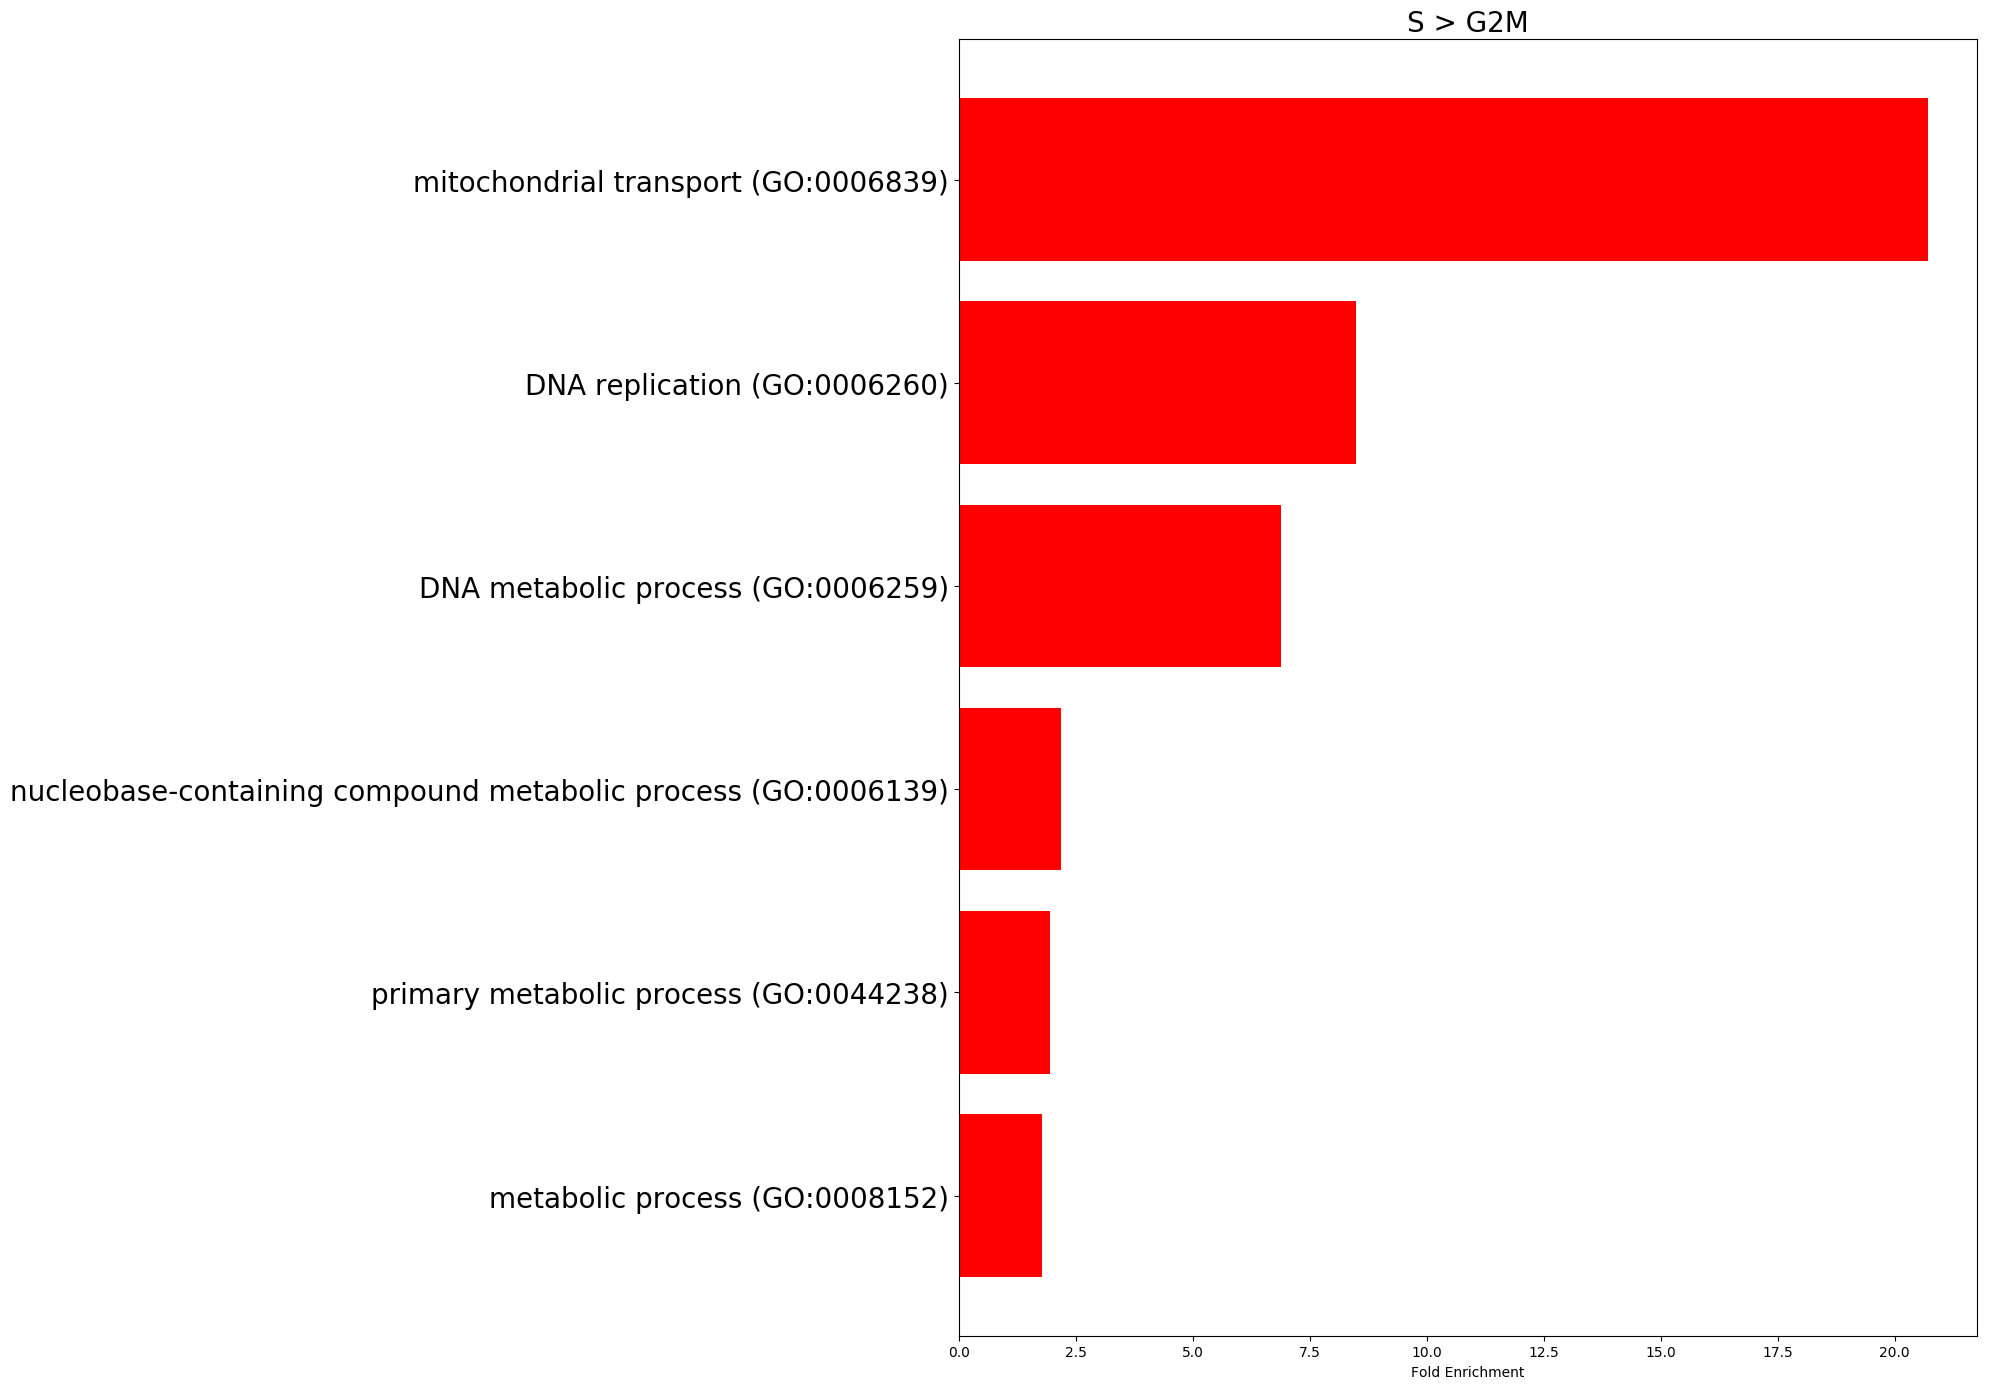

In [23]:
plot_GO_terms(GO_S_G2M_pos.head(n=10), 'S > G2M')